In [59]:
# Regular stack
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
np.random.seed(10)
random.seed(10)

# Statistical test library
import scipy.stats as stats

# ML
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# NLP
import nltk

# Table of contents

1. [Intro to Pandas](#introToPandas)    
    1.1. [Series](#series)    
    1.2. [DataFrames](#dataframes)    
2. [Data wrangling with Pandas](#dataWrangling)    
3. [Data from Web](#dataFromWeb)    
4. [Interactive Viz](#interactiveViz)    
5. [Applied ML](#appliedML)    
6. [Taming Text](#tamingText)    

## 1. Intro to Pandas <a name="introToPandas"></a>

### 1.1. Series <a name="series"></a>

In [4]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

In [5]:
# Slicing
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [7]:
# Slicing
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

In [8]:
# Filtering
bacteria[bacteria>1000]

Proteobacteria    1638
dtype: int64

In [9]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569,
                 'Bacteroidetes': 115}
bacteria2 = pd.Series(bacteria_dict, 
                      index=['Cyanobacteria','Firmicutes',
                             'Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [10]:
# Data alignment (align data)
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

### 1.2. DataFrames <a name="dataframes"></a>

In [11]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [12]:
# Columns
data.columns

Index(['patient', 'phylum', 'value'], dtype='object')

In [16]:
# Column types (dtypes)
data.dtypes

patient     int64
phylum     object
value       int64
dtype: object

In [15]:
# Indices
data.index

RangeIndex(start=0, stop=8, step=1)

In [17]:
# Row access (by index value)
data.loc[3]

patient                1
phylum     Bacteroidetes
value                115
Name: 3, dtype: object

In [19]:
# Row access (by index position) - here its the same but sometimes not
data.iloc[3]

patient                1
phylum     Bacteroidetes
value                115
Name: 3, dtype: object

In [20]:
# Column drop
data_novalue = data.drop('value', axis=1)
data_novalue

,patient,phylum
0,1,Firmicutes
1,1,Proteobacteria
2,1,Actinobacteria
3,1,Bacteroidetes
4,2,Firmicutes
5,2,Proteobacteria
6,2,Actinobacteria
7,2,Bacteroidetes


In [23]:
# Row drop
data_novalue = data.drop(1, axis=0)
data_novalue

,patient,phylum,value
0,1,Firmicutes,632
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [24]:
# Csv Read
pd.read_csv("Data/microbiome_missing.csv").head(5)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0


In [25]:
# null check
pd.isnull(pd.read_csv("Data/microbiome_missing.csv")).head(5)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False


In [26]:
# special nan values
pd.read_csv("Data/microbiome_missing.csv", na_values=['?', -99999]).head(5)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0


In [28]:
# drop nan
pd.read_csv("Data/microbiome_missing.csv", na_values=['?', -99999]).dropna().head(5)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0


In [29]:
# fill nan
pd.read_csv("Data/microbiome_missing.csv", na_values=['?', -99999]).fillna(0).head(5)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,0.0,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0


In [30]:
# Apply function row wise
baseball = pd.read_csv("Data/baseball.csv", index_col='id')

def slugging(x): 
    bases = x['h']-x['X2b']-x['X3b']-x['hr'] + 2*x['X2b'] + 3*x['X3b'] + 4*x['hr']
    ab = x['ab']+1e-6
    
    return bases/ab

baseball.apply(slugging, axis=1).round(3).head(5)

id
88641    0.360
88643    0.500
88645    0.000
88649    0.000
88650    0.167
dtype: float64

In [32]:
# Sum & sort
extra_bases = baseball[['X2b','X3b','hr']].sum(axis=1)
extra_bases.sort_values(ascending=False).head(5)

id
88653    69
89439    57
89361    56
89462    55
89396    54
dtype: int64

In [33]:
# describe data frame
baseball.describe()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
count,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,2006.92000,1.130000,52.380000,136.540000,18.69000,35.820000,7.390000,0.550000,4.370000,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000
std,0.27266,0.337998,48.031299,181.936853,27.77496,50.221807,11.117277,1.445124,7.975537,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826
min,2006.00000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2007.00000,1.000000,9.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2007.00000,1.000000,33.000000,40.500000,2.00000,8.000000,1.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,2007.00000,1.000000,83.250000,243.750000,33.25000,62.750000,11.750000,1.000000,6.000000,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000
max,2007.00000,2.000000,155.000000,586.000000,107.00000,159.000000,52.000000,12.000000,35.000000,96.00000,22.000000,6.000000,132.000000,134.000000,43.000000,11.00000,14.000000,9.000000,21.000000


In [34]:
# describe column
baseball.player.describe()

count           100
unique           82
top       gonzalu01
freq              2
Name: player, dtype: object

In [35]:
# covariance between two columns
baseball.hr.cov(baseball.X2b)

69.076464646464643

In [37]:
# correlation between two columns
baseball.hr.corr(baseball.X2b)

0.77906151825397507

In [38]:
# correlation between whole dataframe
baseball.corr()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
year,1.000000,0.004384,-0.050874,-0.001360,-0.023315,0.001151,-0.052917,-0.246099,0.060199,0.042812,0.030480,0.058296,0.005626,0.069610,0.015868,-0.000664,-0.012184,-0.007282,0.052131
stint,0.004384,1.000000,-0.257552,-0.216333,-0.209781,-0.206878,-0.196423,-0.085821,-0.209124,-0.205688,-0.120837,-0.055425,-0.190301,-0.214121,-0.118580,-0.195074,-0.091527,-0.155662,-0.224173
g,-0.050874,-0.257552,1.000000,0.935910,0.910262,0.929292,0.885847,0.518663,0.802014,0.891563,0.492362,0.520923,0.828572,0.866499,0.514423,0.730161,0.079361,0.767543,0.863041
ab,-0.001360,-0.216333,0.935910,1.000000,0.965609,0.994217,0.952249,0.535986,0.843308,0.947911,0.533536,0.577192,0.850803,0.923926,0.506398,0.767210,0.094537,0.840361,0.926632
r,-0.023315,-0.209781,0.910262,0.965609,1.000000,0.970560,0.923508,0.500807,0.890060,0.941483,0.596343,0.576454,0.915010,0.879375,0.588882,0.806523,-0.001273,0.839592,0.894724
h,0.001151,-0.206878,0.929292,0.994217,0.970560,1.000000,0.957275,0.514245,0.855163,0.952320,0.530018,0.571629,0.853384,0.906966,0.513009,0.767449,0.045533,0.839737,0.935525
X2b,-0.052917,-0.196423,0.885847,0.952249,0.923508,0.957275,1.000000,0.493267,0.779062,0.901751,0.413655,0.477487,0.780012,0.862149,0.453301,0.738226,0.005659,0.819361,0.906860
X3b,-0.246099,-0.085821,0.518663,0.535986,0.500807,0.514245,0.493267,1.000000,0.210028,0.369890,0.450421,0.384312,0.350682,0.408800,0.090993,0.217474,0.187012,0.394987,0.411577
hr,0.060199,-0.209124,0.802014,0.843308,0.890060,0.855163,0.779062,0.210028,1.000000,0.948787,0.364346,0.345187,0.916774,0.865929,0.673691,0.767411,-0.145374,0.782038,0.798350
rbi,0.042812,-0.205688,0.891563,0.947911,0.941483,0.952320,0.901751,0.369890,0.948787,1.000000,0.394633,0.435011,0.893945,0.929410,0.582982,0.780899,-0.054670,0.855260,0.906908


In [ ]:
# Saving to csv or pickle
baseball.to_csv("baseball2.csv")

baseball.to_pickle("baseball_pickle")
pd.read_pickle("baseball_pickle")

## 2. Data wrangling with Pandas <a name="dataWrangling"></a>

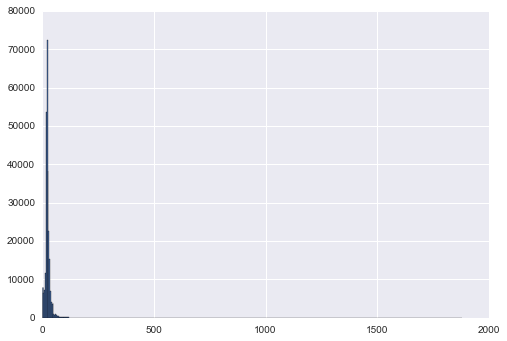

In [40]:
# histogram
segments = pd.read_csv("Data/AIS/transit_segments.csv")
segments.seg_length.hist(bins=500)

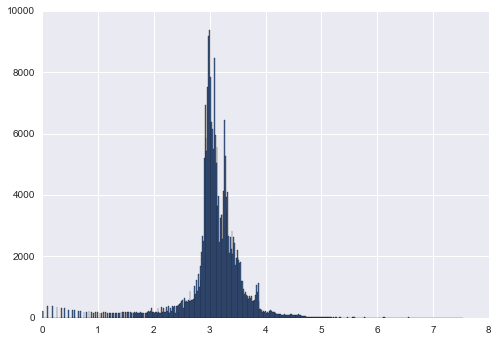

In [41]:
# histogram of logarithm
segments.seg_length.apply(np.log).hist(bins=500)

In [45]:
# datetime parsing (date time parsing)
from dateutil.parser import parse
from datetime import date, time, datetime

segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M')).head(5)

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
Name: st_time, dtype: datetime64[ns]

In [46]:
# parse dates on data load
segments = pd.read_csv("Data/AIS/transit_segments.csv", 
                       parse_dates=['st_time', 'end_time'])

In [47]:
# Merge (merging)

df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))

df1

,age,id
0,29,0
1,25,1
2,27,2
3,29,3


In [48]:
df2 

,id,score
0,0,0.999299
1,1,0.757492
2,2,0.189461
3,0,0.045762
4,1,0.771876
5,2,0.434688


In [49]:
# default inner join on id column
pd.merge(df1, df2)

,age,id,score
0,29,0,0.999299
1,29,0,0.045762
2,25,1,0.757492
3,25,1,0.771876
4,27,2,0.189461
5,27,2,0.434688


In [50]:
# outer merge
pd.merge(df1, df2, how='outer')

,age,id,score
0,29,0,0.999299
1,29,0,0.045762
2,25,1,0.757492
3,25,1,0.771876
4,27,2,0.189461
5,27,2,0.434688
6,29,3,NaN


In [51]:
# drop duplicates
df2.drop_duplicates(['id'])

,id,score
0,0,0.999299
1,1,0.757492
2,2,0.189461


In [54]:
# group by
df2.groupby(df2["id"]).first()

,score
id,
0,0.999299
1,0.757492
2,0.189461


In [55]:
#group by and mean
df2.groupby(df2["id"]).mean().add_suffix('_mean').head()

,score_mean
id,
0,0.522530
1,0.764684
2,0.312075


In [57]:
# transform
normalize = lambda x: (x - x.mean())/x.std()

df2.groupby(df2["id"]).transform(normalize).head()

,score
0,0.707107
1,-0.707107
2,-0.707107
3,-0.707107
4,0.707107


### 3. Data from web <a name="dataFromWeb"></a>

In [ ]:
# filter - Extract all students form the the bachelor set who have bachelor_semestre_1 and bachelor_semestre_6
bachelor_from_2007_df.groupby(['nom_prénom'])
                     .filter(lambda x: x['semester']
                             .str.contains('bachelor_semestre_1').any() and 
                             x['semester'].str.contains('bachelor_semestre_6').any()
                            )


In [ ]:
# two-sample two-sided t-test (t test, Ttest)
stats.ttest_ind(df_male_aggregated, df_female_aggregated, equal_var=False)

# According to the p-value (> $\alpha = 0.05$) we do not reject the null 
# hypotesis. So we claim that there is no statistically significant 
# difference between the averages of the two samples.

### 4. Interactive Viz <a name="interactiveViz"></a>

In [ ]:
# csv data load with specific delimiter and columns
columns = ['Institution', 'University','Approved Amount']
p3 = pd.read_csv("P3_GrantExport.csv", 
                 delimiter=';', 
                 usecols=columns, 
                 na_values=['data not included in P3', 'nan'])

merge join concat
http://pandas.pydata.org/pandas-docs/stable/merging.html

### 5. Applied ML <a name="appliedML"></a>

In [ ]:
# preprocessing - normalizing (normalize, normalization)
preprocessing.normalize(agg_features, norm='l2')

In [ ]:
#One hot encoding

# Step 1: Transform each category into an integer
## For this, we use LabelEncoder from sklearn

label_encoded = categorical_features.apply(LabelEncoder().fit_transform)
label_encoded.head()
# Step 2: Transform each integer into a binary feature
## For this, we use OneHotEncoder

one_hot_encoded = OneHotEncoder().fit_transform(label_encoded).toarray()

one_hot_encoded_features = pd.DataFrame(one_hot_encoded, columns=columns)

one_hot_encoded_features

In [ ]:
# random forest classifier
rfc = RandomForestClassifier(verbose=1, 
                             min_samples_split=2, 
                             oob_score=True)
rfc.fit(X, y)

In [ ]:
## Inspect most relevant features of RandomForest

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Cross validation (cross-validation)
scores = cross_val_score(rfc, X, y, cv=50, scoring='accuracy')
print(scores)
print('Achieved model score: ', np.mean(scores))

In [ ]:
# Kmeans (K-means, k means)
kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
Y_pred = kmeans.labels_

In [ ]:
# ML metrics
conf_mat = confusion_matrix(Y_true, Y_pred)
silhouette = silhouette_score(X_scaled, Y_pred)
f1_score = f1_score(Y_true, Y_pred)

### 6. Taming Text <a name="tamingText"></a>